# Heart Disease Risk Project - Exploratory Data Analysis  

Team 3

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
#data = pd.read_excel('hw1_housing_data.xlsx')
#path = "C:\Users\naike\heart_data.csv"
heart_data_df = pd.read_csv('heart_data.csv')
heart_data_df.head()  

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Data understanding - dataset information
heart_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [4]:
# Data understanding - check for missing values
heart_data_df.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
# Data understanding - check for duplicate values
int(heart_data_df.duplicated().sum())

0

In [6]:
# Data understanding - summary statistics
heart_data_df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>,
        <AxesSubplot:title={'center':'cholesterol'}>],
       [<AxesSubplot:title={'center':'gluc'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

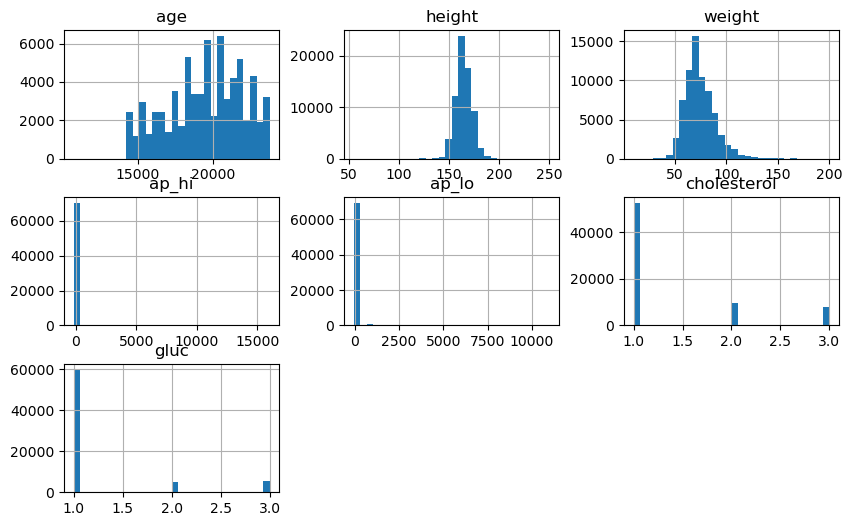

In [7]:
# Data understanding - numerical columns analysis
heart_data_df[["age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]].hist(bins=30, figsize=(10, 6))

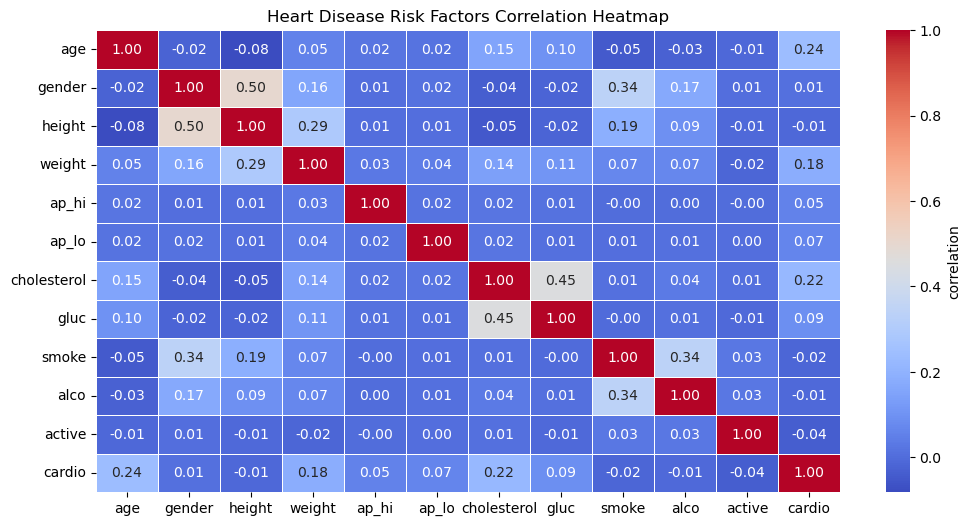

In [8]:
# Data understanding - check for correlation
heart_data_df_num = heart_data_df.iloc[:, 2:]
corr_data = heart_data_df_num.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_data, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'correlation'})
plt.title('Heart Disease Risk Factors Correlation Heatmap')
plt.show()

In [9]:
# # export notebook results to html
# !jupyter nbconvert --to html EDA.ipynb

In [10]:
heart_data_df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
# Modeling - Logistic Regression

X = heart_data_df[['age', 'gender', 'height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]
y = heart_data_df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

model.intercept_, model.coef_

(array([-0.00041598]),
 array([[ 1.08596831e-04,  9.31929931e-05, -4.78364599e-02,
          2.07311641e-02,  3.31481288e-02,  3.48722781e-04,
          2.76233922e-03,  5.43775404e-04, -5.25180865e-05,
         -6.79020907e-05, -7.11011733e-04]]))